### Programming Assignment 3 - Part I
##### Submitted By: Saurabh Kumar (SC22B146)
#### Solution of the Forest management example and study of optimal policies

**State Space:** S = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} represents the age of the forest; could be taken 1 to 10

**Action Space:** A = {0, 1}, where 0: wait, 1: cut

**State Transition probabilities:** P == A x S x S  
For the action 0 (wait): Go to state of 0 with probability 'p' and to the next state with probability (1-p)  
  Pw =  
  |p 1-p   0    0   ...  0  |  
  |p  0   1-p   0   ...  0  |  
  |p  0    0   1-p  ...  0  |   
  | ... ... ... ... ... ... |   
  |p  0    0    0   ...  1-p|   
  |p  0    0    0   ...  1-p|   

For the action 0 (cut): Always return to state 0 with probability 1.  
 Pc =  
 |1 0 0 ... 0|  
 |1 0 0 ... 0|  
 |... ... ... |  
 |1 0 0 ... 0|  

**Reward function:** r == S x A  
For waiting, '0' reward for intermediate states, and a final reward 'r1' for the matured forest.  
For cutting, '1' reward for intermediate states, and a final reward 'r2' for cutting the matured forest.  
r(s,a) =  
|0    0|  
|0    1|  
|0    1|  
|0    1|  
|0    1|  
|r1  r2|  


In [97]:
import mdptoolbox.example

S = 10 # max age
p = 0.1 # probability of fire
gamma = 0.9 # discount factor

# MDP
P, R = mdptoolbox.example.forest(S, r1=4, r2=2, p=p)

print("State transition matrix:\n", "For waiting: \n", P[0], "\n For cutting: \n", P[1])
print("Reward matrix: \n", R)

State transition matrix:
 For waiting: 
 [[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.9 0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.9 0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.9 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.9 0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.9 0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]] 
 For cutting: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Reward matrix: 
 [[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [4. 2.]]


#### Optimal Policy for managing the Forest

In [98]:
vi = mdptoolbox.mdp.ValueIteration(P, R, gamma)
vi.run()

print("Optimal policy:", vi.policy)
print("Optimal value function:", vi.V)

Optimal policy: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Optimal value function: (3.772106445047769, 4.513314520588505, 5.428386218786945, 6.5581043647109425, 7.9528181251109435, 9.674686965110944, 11.800450965110945, 14.424850965110943, 17.664850965110947, 21.664850965110947)


#### Optimal policy as a function of the probability of fire p

In [101]:
p_values = [0.01, 0.1, 0.2, 0.5, 0.8]

policies = []

for p in p_values:
  P, R = mdptoolbox.example.forest(S, r1=4, r2=2, p=p)
  vi = mdptoolbox.mdp.ValueIteration(P, R, gamma)
  vi.run()

  policies.append(vi.policy)


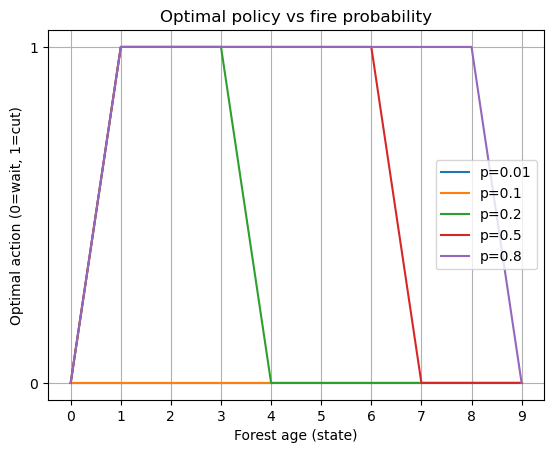

In [102]:
import matplotlib.pyplot as plt

# Plot policies
for i, p in enumerate(p_values):
    plt.plot(range(0, S), policies[i], label=f"p={p}")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1])
plt.xlabel("Forest age (state)")
plt.ylabel("Optimal action (0=wait, 1=cut)")
plt.grid(True)
plt.legend()
plt.title("Optimal policy vs fire probability")
plt.show()

Comment: As probability of fire increases, optimal policy suggests to cut earlier.

#### Optimal policy as a function of the discount factor gamma

In [105]:
gamma_values = [0.1, 0.5, 0.8, 0.99]

policies = []

for gamma in gamma_values:
  P, R = mdptoolbox.example.forest(S, r1=4, r2=2, p=0.1)
  vi = mdptoolbox.mdp.ValueIteration(P, R, gamma)
  vi.run()

  policies.append(vi.policy)

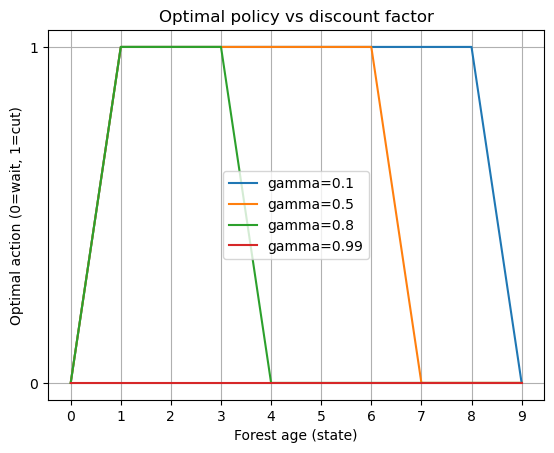

In [106]:
# Plot policies
for i, gamma in enumerate(gamma_values):
    plt.plot(range(0, S), policies[i], label=f"gamma={gamma}")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,1])
plt.xlabel("Forest age (state)")
plt.ylabel("Optimal action (0=wait, 1=cut)")
plt.grid(True)
plt.legend()
plt.title("Optimal policy vs discount factor")
plt.show()

Comment: As discount factor increases (more patience), optimal policy suggests to wait longer before cutting.